# Técnicas de Optimización en el Contexto Empresarial

## Objetivo de la Sesión

En esta sesión, aprenderemos sobre **técnicas de optimización** y cómo aplicarlas para mejorar la toma de decisiones en un contexto empresarial. Nos enfocaremos en cómo maximizar el retorno sobre la inversión en marketing al optimizar la asignación de capital en diferentes canales de adquisición de clientes. Este tipo de optimización es esencial cuando el **Costo de Adquisición de Clientes (CAC)** no sigue una relación lineal y varía según el canal y el volumen de clientes deseado.

---

### Introducción a la Optimización

**La optimización** es el proceso de encontrar el mejor resultado posible bajo un conjunto de restricciones. En el contexto empresarial, esto implica maximizar o minimizar un indicador clave de rendimiento (KPI) o un valor objetivo, como ingresos, CAC o retorno sobre inversión (ROI). La optimización es una herramienta poderosa en el análisis prescriptivo, ya que permite a las empresas decidir cómo asignar sus recursos de manera eficiente.

---

### Importancia de la Optimización en la Asignación de Presupuesto de Marketing

En empresas donde los **canales de adquisición** varían en costo y efectividad, es fundamental determinar la asignación óptima del presupuesto de marketing. Los costos de adquisición tienden a **incrementarse a medida que aumenta el número de usuarios** que se desea adquirir, ya que la competencia se intensifica y se agotan los segmentos de menor costo.

**Objetivos Clave:**
1. **Minimizar el CAC**: Lograr el menor costo posible por cada usuario adquirido.
2. **Maximizar el ARPU (Average Revenue per User)**: Aumentar los ingresos promedio por usuario.
3. **Optimizar la Asignación de Capital**: Asignar el presupuesto a los canales con el mejor rendimiento en términos de CAC y ARPU, sujeto a restricciones.

---

## Método del Caso: Optimización de Presupuesto de Marketing en una Empresa de Software

### Contexto del Caso

La empresa **TechGrowth**, dedicada a vender suscripciones de software de productividad, quiere aumentar su base de usuarios mientras mantiene un CAC razonable. Sin embargo, el costo de adquirir nuevos usuarios depende del canal y de la cantidad de usuarios que la empresa intenta captar en cada canal. Por ejemplo, adquirir los primeros usuarios a través de Google Ads puede ser más barato, pero a medida que aumentan los usuarios captados, el costo por usuario también sube debido a la competencia.

**Canales de Adquisición de Clientes**:
1. **Google Ads**: Costoso pero con gran alcance.
2. **Facebook Ads**: Moderado en costo, útil para segmentación detallada.
3. **Marketing de Contenidos**: Coste inicial bajo, pero requiere tiempo para ver resultados.
4. **Publicidad en LinkedIn**: Específico para clientes en el sector empresarial, con un CAC alto, pero mayor conversión.

### Objetivo del Caso

Optimizar el presupuesto de marketing para maximizar el número de usuarios adquiridos sin sobrepasar el límite del presupuesto asignado. Se busca equilibrar los **costos** y los **resultados** de cada canal para obtener el mejor rendimiento en términos de CAC y usuarios adquiridos.

### Restricciones del Caso
- **Presupuesto límite**: La empresa dispone de un presupuesto total fijo para asignar entre los canales.
- **Costo incremental**: Cada canal tiene un **CAC creciente** a medida que se adquieren más usuarios.
- **Objetivo mínimo de usuarios**: La empresa desea captar un número mínimo de usuarios para justificar el gasto de marketing.

---

## Ejercicio Práctico: Optimización de la Asignación de Presupuesto

A continuación, utilizaremos Python y técnicas de optimización para resolver el caso. Vamos a definir y resolver un modelo de optimización en el que asignaremos el presupuesto entre los canales de adquisición con base en el CAC y el número de usuarios objetivo.

**Supuestos del Ejercicio**:
- Cada canal tiene una función de CAC que depende del número de usuarios adquiridos en ese canal.
- El CAC aumenta a medida que se captan más usuarios en un canal específico.

---

### Paso 1: Definir las Funciones de CAC para Cada Canal

Cada canal tendrá una función de costo incremental basada en el número de usuarios que se desean adquirir. Esto simula el aumento en el CAC conforme aumentan los usuarios captados.

In [1]:
import numpy as np

# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 10 + 0.05 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 8 + 0.03 * users

def cac_content_marketing(users):
    return 5 + 0.02 * users

def cac_linkedin(users):
    return 15 + 0.07 * users

### Paso 2: Definir el Problema de Optimización
Utilizaremos Programación No Lineal para maximizar el número de usuarios sujeto a restricciones de presupuesto.

In [2]:
from scipy.optimize import minimize

# Presupuesto total en USD
budget = 10000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")


Usuarios adquiridos por canal:
Google Ads: 103
Facebook Ads: 205
Marketing de Contenidos: 383
LinkedIn: 38
Costo total estimado: $10,000.00
Usuarios totales adquiridos: 729


### Paso 3: Interpretación y Análisis de Resultados
- ¿Cuál es la mejor asignación de presupuesto para cada canal?
- ¿Qué canales generan un CAC más bajo en función del objetivo de usuarios?
- ¿Cómo impacta la restricción de presupuesto en la asignación óptima de usuarios?


### Reflexión Final
1. Ventajas de la Optimización en el Marketing: Identificar cómo la optimización ayuda a maximizar la adquisición de clientes manteniendo los costos controlados.
2. Impacto en la Estrategia de Negocios: Reflexionar sobre cómo la asignación óptima de presupuesto puede influir en el crecimiento de la empresa.
3. Consideraciones Futuras: Discutir qué otros factores, como la tasa de conversión o el ARPU, podrían incluirse en futuros análisis de optimización.


### Reporte de laboratorio
- Discusión en Clase: Discutir los resultados obtenidos y comparar con estrategias de marketing en casos reales.
- Trabajo en Equipo:
    - Análisis de CAC Incremental: Simula cómo cambian los resultados al ajustar los coeficientes de incremento de CAC en cada canal.
    - Simulación de Escenarios: Experimenta con diferentes límites de presupuesto y objetivos de usuarios, observando cómo cambian los resultados de la optimización.
    - Visualización de Resultados: Utiliza gráficos para visualizar el costo incremental por usuario y comparar el rendimiento de cada canal.
    - Cuanto debo de gastar en cada canal.

### Reporte de Laboratorio #7

Camila Daniela Zapata

Santiago Reyes Castillo

### ESCENARIO 1: DESAPARECE UN CANAL DE ADQUISICIÓN DE CLIENTES

En este escenario, analizamos el resultado del modelo si es que el canal de adquisición que más clientes nos trajo no existiera, en este caso Marketing de Contenidos, para ver cómo se distribuirían los usuarios obtenidos.

In [8]:
import numpy as np

# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 10 + 0.05 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 8 + 0.03 * users

def cac_linkedin(users):
    return 15 + 0.07 * users

In [9]:
from scipy.optimize import minimize

# Presupuesto total en USD
budget = 10000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, linkedin_users = x
    return -1 * (google_users + fb_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"LinkedIn: {int(result.x[2])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")


Usuarios adquiridos por canal:
Google Ads: 164
Facebook Ads: 307
LinkedIn: 81
Costo total estimado: $10,000.00
Usuarios totales adquiridos: 554


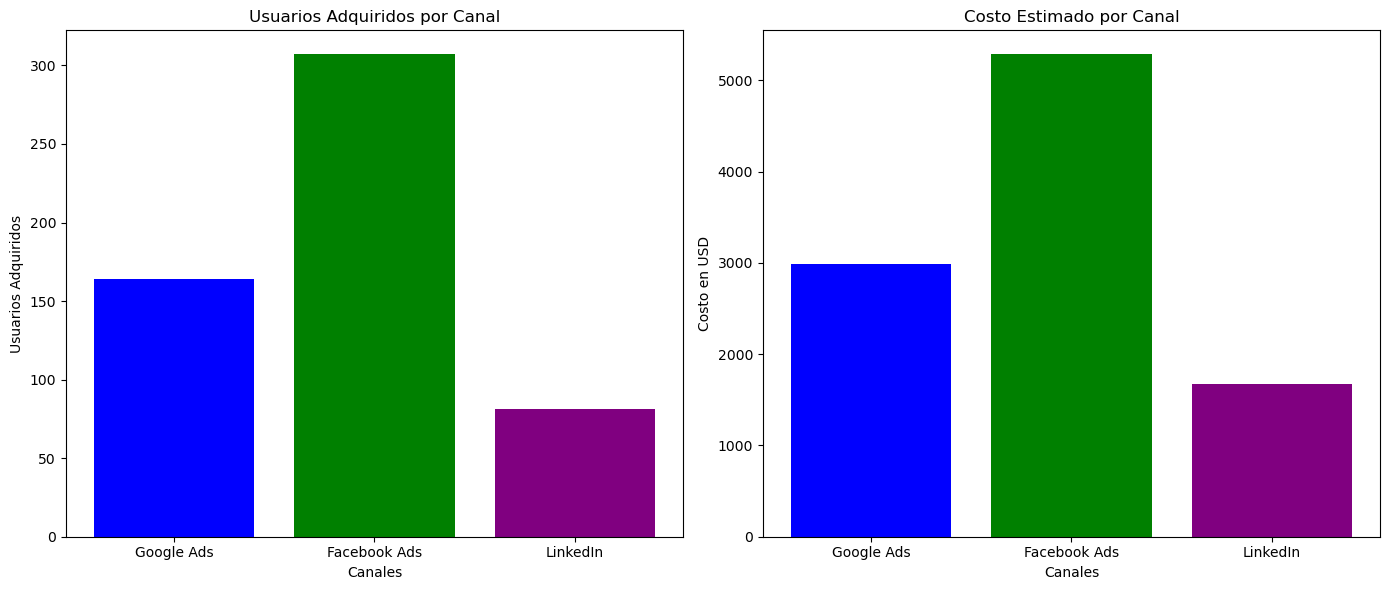

In [11]:
import matplotlib.pyplot as plt

google_users = int(result.x[0])
fb_users = int(result.x[1])
linkedin_users = int(result.x[2])

google_cost = google_users * cac_google_ads(google_users)
fb_cost = fb_users * cac_facebook_ads(fb_users)
linkedin_cost = linkedin_users * cac_linkedin(linkedin_users)

channels = ['Google Ads', 'Facebook Ads', 'LinkedIn']
users_acquired = [google_users, fb_users, linkedin_users]
costs = [google_cost, fb_cost, linkedin_cost]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(channels, users_acquired, color=['blue', 'green', 'purple'])
ax[0].set_title('Usuarios Adquiridos por Canal')
ax[0].set_xlabel('Canales')
ax[0].set_ylabel('Usuarios Adquiridos')

ax[1].bar(channels, costs, color=['blue', 'green', 'purple'])
ax[1].set_title('Costo Estimado por Canal')
ax[1].set_xlabel('Canales')
ax[1].set_ylabel('Costo en USD')

plt.tight_layout()
plt.show()

Vemos que la distribución de los clientes es similar a el escenario original en orden de más clientes generados, van Facebook, Google y al final LinkedIn, sin embargo, cada uno capta un poco más de clientes pero los usuarios totales adquiridos se reducen en casi 200, por lo que podemos inferir que casi seguramente, el canal de adquisición de clientes más importante para la empresa es Marketing Contents.

### ESCENARIO 2: DISTINTOS COEFICIENTES

Ahora, veremos qué sucede si los coeficientes para el costo añadido de cada usuario por canal de adquisición cambian, y cómo esto repercute en la cantidad de usuarios finales que podemos adquirir.

In [5]:
import numpy as np

# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 8 + 0.055 * users  # Reducimos el costo inicial y coeficiente un poco

def cac_facebook_ads(users):
    return 8 + 0.04 * users # Únicamente elevamos el coeficiente

def cac_content_marketing(users):
    return 5 + 0.04 * users # Elevamos sustancialmente el coeficiente

def cac_linkedin(users):
    return 15 + 0.035 * users # Reducimos el coeficiente sustancialmente



# Coeficiente originales
# # Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
# def cac_google_ads(users):
#     return 10 + 0.05 * users  # Incremental cost per user

# def cac_facebook_ads(users):
#     return 8 + 0.03 * users

# def cac_content_marketing(users):
#     return 5 + 0.02 * users

# def cac_linkedin(users):
#     return 15 + 0.07 * users


In [6]:
from scipy.optimize import minimize

# Presupuesto total en USD
budget = 10000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")


Usuarios adquiridos por canal:
Google Ads: 133
Facebook Ads: 183
Marketing de Contenidos: 221
LinkedIn: 109
Costo total estimado: $10,000.00
Usuarios totales adquiridos: 648


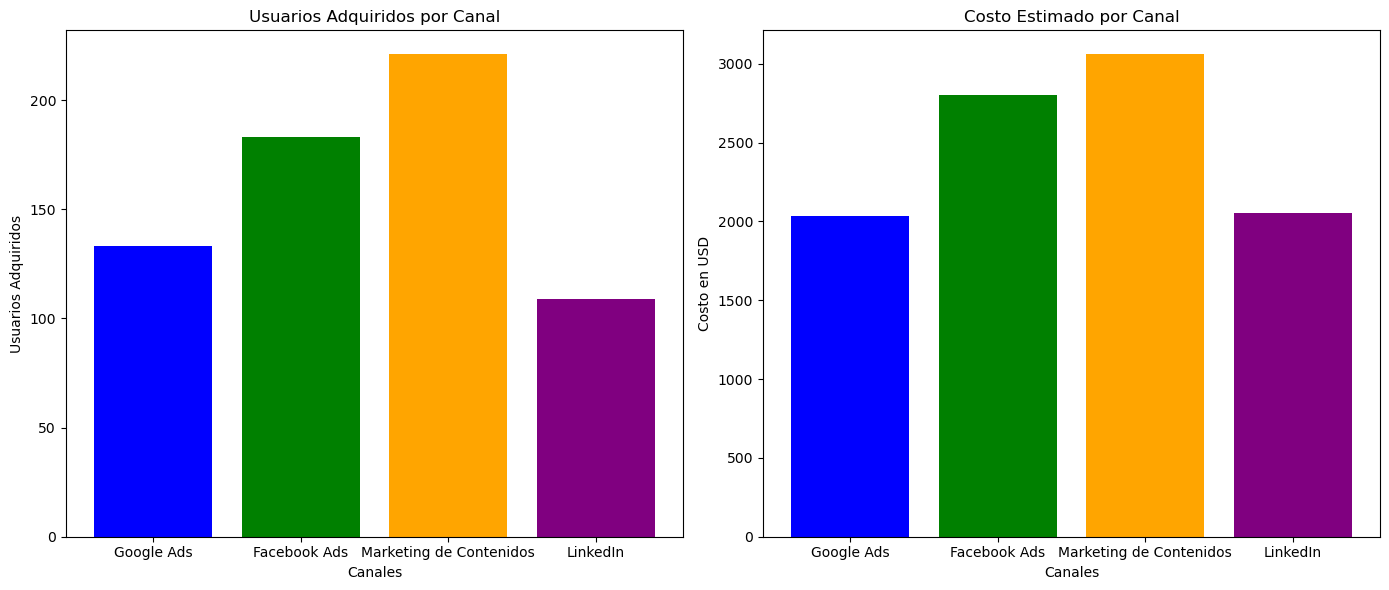

In [7]:
import matplotlib.pyplot as plt

google_users = int(result.x[0])
fb_users = int(result.x[1])
content_users = int(result.x[2])
linkedin_users = int(result.x[3])

google_cost = google_users * cac_google_ads(google_users)
fb_cost = fb_users * cac_facebook_ads(fb_users)
content_cost = content_users * cac_content_marketing(content_users)
linkedin_cost = linkedin_users * cac_linkedin(linkedin_users)

channels = ['Google Ads', 'Facebook Ads', 'Marketing de Contenidos', 'LinkedIn']
users_acquired = [google_users, fb_users, content_users, linkedin_users]
costs = [google_cost, fb_cost, content_cost, linkedin_cost]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(channels, users_acquired, color=['blue', 'green', 'orange', 'purple'])
ax[0].set_title('Usuarios Adquiridos por Canal')
ax[0].set_xlabel('Canales')
ax[0].set_ylabel('Usuarios Adquiridos')

ax[1].bar(channels, costs, color=['blue', 'green', 'orange', 'purple'])
ax[1].set_title('Costo Estimado por Canal')
ax[1].set_xlabel('Canales')
ax[1].set_ylabel('Costo en USD')

plt.tight_layout()
plt.show()

Vemos que en este caso, la distribución se iguala un poco, en el sentido en qué cada canal nos da una cantidad de usuarios más cercana. Lo más importante a notar en este caso es que a pesar de que LinkedIn vio su coeficiente reducido a la mitad, aún sigue siendo el más "caro", por lo que no nos atrar tantos clientes, mientras que marketing sigue siendo el líder a pesar de haber duplicado su coeficiente. Además, el total de clientes adquiridos es menor al escenario original. 

### ESCENARIO 3: CRECE EL PRESUPUESTO

En este ejemplo vamos a utilizar los coeficientes con los que adquirimos más usuarios y vamos a aumentar el presupuesto a 15,000

In [1]:
import numpy as np

# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 8 + 0.055 * users  # Reducimos el costo inicial y coeficiente un poco

def cac_facebook_ads(users):
    return 8 + 0.04 * users # Únicamente elevamos el coeficiente

def cac_content_marketing(users):
    return 5 + 0.04 * users # Elevamos sustancialmente el coeficiente

def cac_linkedin(users):
    return 15 + 0.035 * users # Reducimos el coeficiente sustancialmente

In [3]:
from scipy.optimize import minimize

# Presupuesto total en USD
budget = 15000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")


Usuarios adquiridos por canal:
Google Ads: 171
Facebook Ads: 235
Marketing de Contenidos: 273
LinkedIn: 169
Costo total estimado: $15,000.00
Usuarios totales adquiridos: 850


En este caso vemos que aunque aumentamos el presupuesto casi por la mitad el número de usuarios no aumento tan significativamente respecto al ejemplo orginial que hicimos en clase, ya que con ese ejemplo tuvimos un presupuesto de 10,000 y logramos obtener 729 usuarios, por ende nos damos cuenta que es más importante los coeficientes que el presupuesto ya que por medio de estos es que verdaderamente le podemos sacar el mayor provecho a los recursos. 

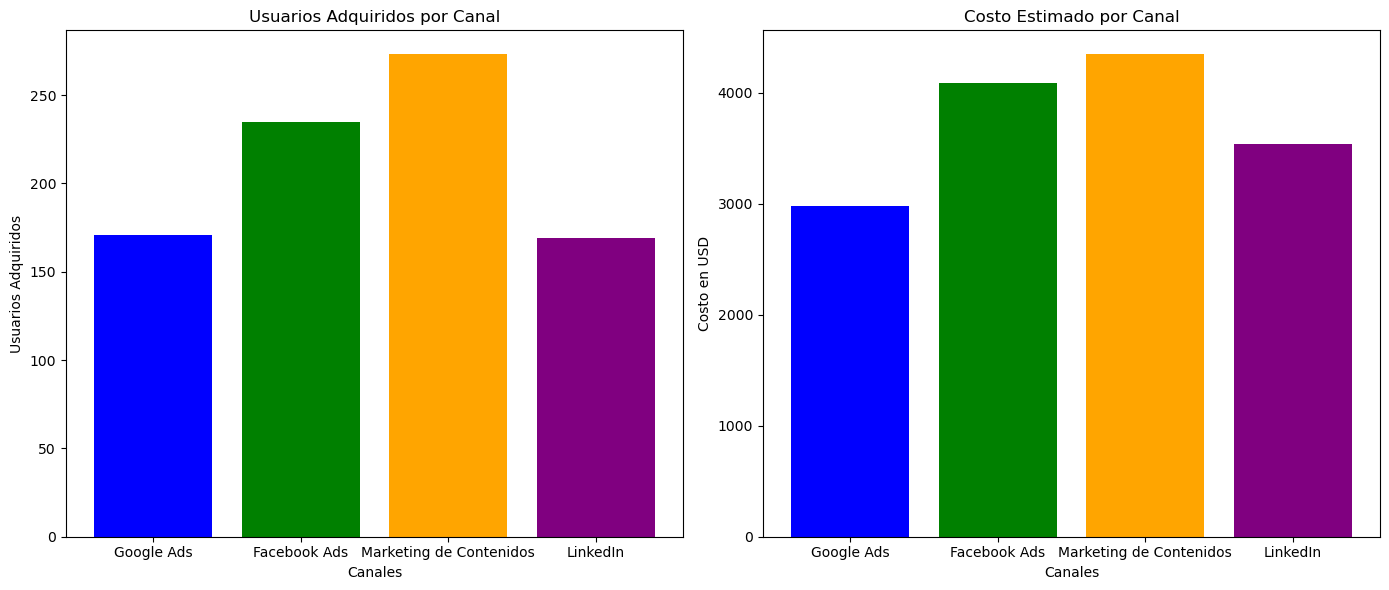

In [4]:
import matplotlib.pyplot as plt

google_users = int(result.x[0])
fb_users = int(result.x[1])
content_users = int(result.x[2])
linkedin_users = int(result.x[3])

google_cost = google_users * cac_google_ads(google_users)
fb_cost = fb_users * cac_facebook_ads(fb_users)
content_cost = content_users * cac_content_marketing(content_users)
linkedin_cost = linkedin_users * cac_linkedin(linkedin_users)

channels = ['Google Ads', 'Facebook Ads', 'Marketing de Contenidos', 'LinkedIn']
users_acquired = [google_users, fb_users, content_users, linkedin_users]
costs = [google_cost, fb_cost, content_cost, linkedin_cost]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(channels, users_acquired, color=['blue', 'green', 'orange', 'purple'])
ax[0].set_title('Usuarios Adquiridos por Canal')
ax[0].set_xlabel('Canales')
ax[0].set_ylabel('Usuarios Adquiridos')

ax[1].bar(channels, costs, color=['blue', 'green', 'orange', 'purple'])
ax[1].set_title('Costo Estimado por Canal')
ax[1].set_xlabel('Canales')
ax[1].set_ylabel('Costo en USD')

plt.tight_layout()
plt.show()